# Forecasting Model_Arima
#Dataset:"spot-prices-for-crude-oil-and-petroleum-products.csv"

#The price of Brent crude from the North Sea.
#WTI the price of the New York Mercantile Exchange (NYMEX)

In [95]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [96]:
#series = read_csv('spot-prices-for-crude-oil-and-petroleum-products.csv', header=0, index_col=0, parse_dates=True)
series = read_csv('spot-prices-for-crude-oil-and-petroleum-products.csv', sep=';',header=0, index_col=0, parse_dates=True)
#parse_dates=True then index will be DatatimeIndex

In [97]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9193 entries, 2001-12-31 to 1986-04-08
Data columns (total 2 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Brent Spot Price (U.S. Dollars per Barrel)  8777 non-null   float64
 1   WTI Spot Price (U.S. Dollars per Barrel)    9061 non-null   float64
dtypes: float64(2)
memory usage: 215.5 KB


In [98]:
#Chk Missing values in Data set
print("Missing Values Before Imputation :",pd.isnull(series).sum())
# Fill Missing values using interpolate-liner method
series.interpolate(method='linear', inplace=True)
#Chk Missing values in Data set
print("Missing Values After Interpolate-Linear Method :",pd.isnull(series).sum())

Missing Values Before Imputation : Brent Spot Price (U.S. Dollars per Barrel)    416
WTI Spot Price (U.S. Dollars per Barrel)      132
dtype: int64
Missing Values After Interpolate-Linear Method : Brent Spot Price (U.S. Dollars per Barrel)    0
WTI Spot Price (U.S. Dollars per Barrel)      0
dtype: int64


In [99]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9193 entries, 2001-12-31 to 1986-04-08
Data columns (total 2 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Brent Spot Price (U.S. Dollars per Barrel)  9193 non-null   float64
 1   WTI Spot Price (U.S. Dollars per Barrel)    9193 non-null   float64
dtypes: float64(2)
memory usage: 215.5 KB


In [124]:
series1=series

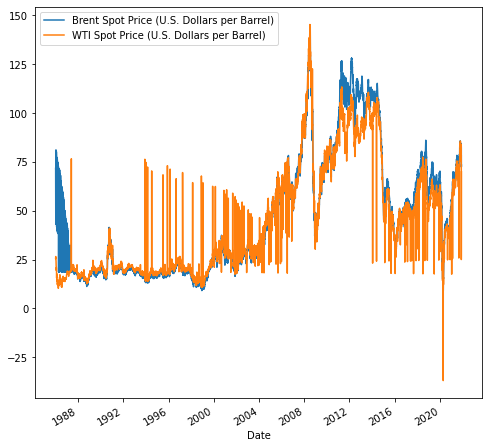

In [100]:
# line plot of time series
from matplotlib import pyplot
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [8, 8]
series.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Brent Spot Price (U.S. Dollars per Barrel)'}>,
        <AxesSubplot:title={'center':'WTI Spot Price (U.S. Dollars per Barrel)'}>]],
      dtype=object)

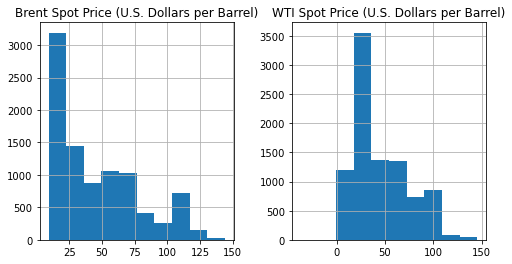

In [101]:
# changing the rc parameters and plotting a Histogram
plt.rcParams['figure.figsize'] = [8, 4]
series.hist()

<AxesSubplot:ylabel='Density'>

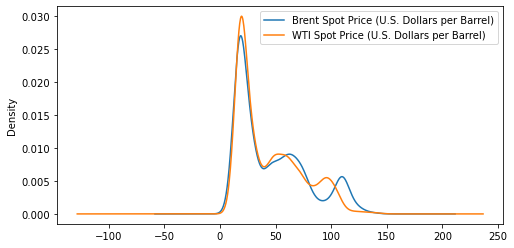

In [102]:
series.plot(kind='kde')

In [103]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 9183, Validation 10


#### Persistence/ Base model

In [104]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [105]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Brent Predicted =%.3f, Expected =%.3f  WTI Predicted =%.3f, Expected =%.3f' % (yhat[0], obs[0],yhat[1], obs[1]))
   
# report performance
rmse_Brent = sqrt(mean_squared_error(test[0], predictions[0]))
rmse_WTI = sqrt(mean_squared_error(test[1], predictions[1]))
print('>RMSE Brent: %.3f' % rmse_Brent)
print('RMSE WTI: %.3f' % rmse_WTI)


>Brent Predicted =126.460, Expected =115.950  WTI Predicted =109.500, Expected =103.540
>Brent Predicted =115.950, Expected =115.450  WTI Predicted =103.540, Expected =104.890
>Brent Predicted =115.450, Expected =114.180  WTI Predicted =104.890, Expected =101.470
>Brent Predicted =114.180, Expected =112.950  WTI Predicted =101.470, Expected =101.200
>Brent Predicted =112.950, Expected =111.470  WTI Predicted =101.200, Expected =96.520
>Brent Predicted =111.470, Expected =113.910  WTI Predicted =96.520, Expected =95.830
>Brent Predicted =113.910, Expected =109.770  WTI Predicted =95.830, Expected =96.040
>Brent Predicted =109.770, Expected =103.120  WTI Predicted =96.040, Expected =83.660
>Brent Predicted =103.120, Expected =99.930  WTI Predicted =83.660, Expected =84.390
>Brent Predicted =99.930, Expected =100.400  WTI Predicted =84.390, Expected =89.540
>Brent Predicted =100.400, Expected =96.760  WTI Predicted =89.540, Expected =86.740
>Brent Predicted =96.760, Expected =97.860  WTI 

>Brent Predicted =42.710, Expected =39.720  WTI Predicted =41.140, Expected =39.340
>Brent Predicted =39.720, Expected =40.090  WTI Predicted =39.340, Expected =39.880
>Brent Predicted =40.090, Expected =40.620  WTI Predicted =39.880, Expected =39.820
>Brent Predicted =40.620, Expected =41.590  WTI Predicted =39.820, Expected =40.470
>Brent Predicted =41.590, Expected =41.100  WTI Predicted =40.470, Expected =39.690
>Brent Predicted =41.100, Expected =42.720  WTI Predicted =39.690, Expected =41.390
>Brent Predicted =42.720, Expected =45.720  WTI Predicted =41.390, Expected =42.760
>Brent Predicted =45.720, Expected =45.280  WTI Predicted =42.760, Expected =42.610
>Brent Predicted =45.280, Expected =44.840  WTI Predicted =42.610, Expected =42.880
>Brent Predicted =44.840, Expected =44.430  WTI Predicted =42.880, Expected =42.440
>Brent Predicted =44.430, Expected =45.210  WTI Predicted =42.440, Expected =42.910
>Brent Predicted =45.210, Expected =44.860  WTI Predicted =42.910, Expected 

>Brent Predicted =18.500, Expected =18.150  WTI Predicted =20.380, Expected =20.180
>Brent Predicted =18.150, Expected =17.650  WTI Predicted =20.180, Expected =19.550
>Brent Predicted =17.650, Expected =18.200  WTI Predicted =19.550, Expected =19.460
>Brent Predicted =18.200, Expected =17.700  WTI Predicted =19.460, Expected =21.770
>Brent Predicted =17.700, Expected =19.200  WTI Predicted =21.770, Expected =20.120
>Brent Predicted =19.200, Expected =19.300  WTI Predicted =20.120, Expected =20.130
>Brent Predicted =19.300, Expected =19.030  WTI Predicted =20.130, Expected =19.540
>Brent Predicted =19.030, Expected =18.880  WTI Predicted =19.540, Expected =20.130
>Brent Predicted =18.880, Expected =20.015  WTI Predicted =20.130, Expected =20.660
>Brent Predicted =20.015, Expected =21.150  WTI Predicted =20.660, Expected =21.320
>Brent Predicted =21.150, Expected =22.250  WTI Predicted =21.320, Expected =24.620
>Brent Predicted =22.250, Expected =21.500  WTI Predicted =24.620, Expected 

>Brent Predicted =50.360, Expected =50.740  WTI Predicted =50.220, Expected =51.920
>Brent Predicted =50.740, Expected =51.290  WTI Predicted =51.920, Expected =51.370
>Brent Predicted =51.290, Expected =52.470  WTI Predicted =51.370, Expected =54.330
>Brent Predicted =52.470, Expected =53.220  WTI Predicted =54.330, Expected =55.310
>Brent Predicted =53.220, Expected =51.750  WTI Predicted =55.310, Expected =54.060
>Brent Predicted =51.750, Expected =51.520  WTI Predicted =54.060, Expected =49.430
>Brent Predicted =51.520, Expected =53.970  WTI Predicted =49.430, Expected =55.050
>Brent Predicted =53.970, Expected =53.680  WTI Predicted =55.050, Expected =54.900
>Brent Predicted =53.680, Expected =51.870  WTI Predicted =54.900, Expected =53.900
>Brent Predicted =51.870, Expected =52.100  WTI Predicted =53.900, Expected =53.700
>Brent Predicted =52.100, Expected =50.050  WTI Predicted =53.700, Expected =52.200
>Brent Predicted =50.050, Expected =47.600  WTI Predicted =52.200, Expected 

#### ARIMA Hyperparameters

In [106]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values

In [129]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train[2], order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [122]:
train

,19.35,19.96
2001-12-31,,
2001-12-27,18.87,21.07
2001-12-19,19.03,19.37
2001-12-11,17.61,18.04
2001-12-07,17.81,19.08
2001-11-30,18.92,19.46
...,...,...
1986-10-23,18.63,14.88
1986-10-15,18.63,14.83
1986-10-01,18.63,15.23


In [130]:
# load dataset
#train = read_csv('spot-prices-for-crude-oil-and-petroleum-products.csv', sep=';',header=0, index_col=0, parse_dates=True)
train=series1
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9193 entries, 2001-12-31 to 1986-04-08
Data columns (total 2 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Brent Spot Price (U.S. Dollars per Barrel)  9193 non-null   float64
 1   WTI Spot Price (U.S. Dollars per Barrel)    9193 non-null   float64
dtypes: float64(2)
memory usage: 215.5 KB


#### Build Model based on the optimized values

In [109]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [110]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [111]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

ValueError: endog is required to have ndim 1 but has ndim 2

In [ ]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

#### Combine train and test data and build final model

In [ ]:
# fit model
data = read_csv('water.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [ ]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

In [ ]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [ ]:
forecast